In [2]:
%matplotlib inline
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras_acgan import build_generator, build_discriminator
from glob import glob

In [3]:
base_dir = '/tmp/keras_acgan_data'

In [102]:
latent_size = 100
num_classes = 10

# build a generator and load the weights from the last epoch
generator = build_generator(latent_size, num_classes)
generator.load_weights(glob(os.path.join(base_dir, 'params_generator*'))[-1])


## Generate images

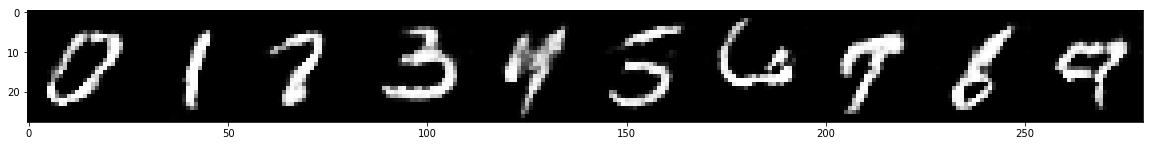

In [153]:
noise = np.random.uniform(-1, 1, (10, latent_size))
labels = np.arange(10)
generated_images = generator.predict([noise, labels])

generated_images = generated_images * 127.5 + 127.5
row = np.concatenate([i.squeeze() for i in np.split(generated_images, 10)], axis=-1)

plt.figure(figsize=(20,10))
plt.imshow(row, cmap='gray')
plt.show()


## Test discriminator

In [154]:
# build a discriminator and load the weights from the last epoch
discriminator = build_discriminator(num_classes)
discriminator.load_weights(glob(os.path.join(base_dir, 'params_discriminator*'))[-1])

Test discriminator on a random image:

In [155]:
random_image = np.random.uniform(-1, 1, (1, 28, 28, 1))
is_real_prob, class_probs = discriminator.predict(random_image)
print('Is real probability: %.5f' % is_real_prob[0][0])


Is real probability: 0.01956


Test discriminator on generated images:

In [156]:

noise = np.random.uniform(-1, 1, (10, latent_size))
label = np.arange(10)
generated_images = generator.predict([noise, label])

idx = np.arange(10)
is_real_probs, class_probs = discriminator.predict(generated_images)
for i, is_real, class_prob in zip(idx, is_real_probs, class_probs):
    print('Image %d: predicted_class=%d is_real_prob=%f' % (i, class_prob.argmax(), is_real[0]))


Image 0: predicted_class=0 is_real_prob=0.686972
Image 1: predicted_class=1 is_real_prob=0.761248
Image 2: predicted_class=2 is_real_prob=0.556456
Image 3: predicted_class=3 is_real_prob=0.605129
Image 4: predicted_class=4 is_real_prob=0.666283
Image 5: predicted_class=5 is_real_prob=0.773854
Image 6: predicted_class=6 is_real_prob=0.321824
Image 7: predicted_class=7 is_real_prob=0.719175
Image 8: predicted_class=8 is_real_prob=0.759448
Image 9: predicted_class=9 is_real_prob=0.689945


Test discriminator on real images

In [157]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = (x_test.astype(np.float32) - 127.5) / 127.5
x_test = np.expand_dims(x_test, axis=-1)

idx = np.arange(10)
is_real_probs, class_probs = discriminator.predict(x_test[:10])
for i, is_real, class_prob, real_class in zip(idx, is_real_probs, class_probs, y_test[:10]):
    print('Image %d: predicted_class=%d real_class=%d is_real_prob=%f' % (i, class_prob.argmax(), real_class, is_real[0]))
    

Image 0: predicted_class=7 real_class=7 is_real_prob=0.855357
Image 1: predicted_class=2 real_class=2 is_real_prob=0.806631
Image 2: predicted_class=1 real_class=1 is_real_prob=0.679157
Image 3: predicted_class=0 real_class=0 is_real_prob=0.755746
Image 4: predicted_class=4 real_class=4 is_real_prob=0.374756
Image 5: predicted_class=1 real_class=1 is_real_prob=0.810052
Image 6: predicted_class=4 real_class=4 is_real_prob=0.472261
Image 7: predicted_class=9 real_class=9 is_real_prob=0.696396
Image 8: predicted_class=5 real_class=5 is_real_prob=0.498745
Image 9: predicted_class=9 real_class=9 is_real_prob=0.941325
